### Prerequisite Concepts
#### 1. Positive Semi-Definite Matrices
- A matrix $M$ is positive semi-definite (PSD) if for any vector $x \in \mathbb{R}^n$:
  $$
  x^\top M x \geq 0
  $$
- **All PSDs are symmetric**. That is, for any PSD matrix $M$, we have:
  $$
  M = M^\top
  $$
- Know why? Explain in comments. 
---

#### 2. Spectral Decomposition of PSD Matrices
- For a symmetric matrix $A$, there exists an orthogonal matrix $Q$ and a diagonal matrix $\Lambda$ such that:
  $$
  A = Q \Lambda Q^\top
  $$
  where:
  - $Q$ is orthogonal ($Q^\top Q = I$),
  - $\Lambda$ is diagonal with eigenvalues of $A$.

---

### 3. For any $A$ with all real elements, $A^\top A$ and $AA^\top$ are always PSD
- $A^\top A$ is PSD:
  - For any $x \in \mathbb{R}^n$:
    $$
    x^\top A^\top A x = ||Ax||^2 \geq 0
    $$
    - Hence, $A^\top A$ is PSD.
  
- $AA^\top$ is PSD:
  - For any $y \in \mathbb{R}^m$:
    $$
    y^\top A A^\top y = ||A^\top y||^2 \geq 0
    $$
    - Hence, $AA^\top$ is PSD.

---

### SVD of $A$
- The Singular Value Decomposition (SVD) of a matrix $A$ (size $m \times n$) is:
  $$
  A = U \Sigma V^\top
  $$
  where:
  - $U \in \mathbb{R}^{m \times m}$ is orthogonal ($U^\top U = I$),
  - $\Sigma \in \mathbb{R}^{m \times n}$ is diagonal with singular values $\sigma_1, \sigma_2, ..., \sigma_k$ on the diagonal,
  - $V \in \mathbb{R}^{n \times n}$ is orthogonal ($V^\top V = I$),
  - $k$ is the rank of $A$, defined as $k \leq \min(m, n)$, where $k$ represents the number of non-zero singular values of $A$.
  - The rank of $A$ is always $\leq \min(m, n)$.

---

### Spectral Decomposition of $A^\top A$
- Using $A = U \Sigma V^\top$, we have:
  $$
  A^\top A = (U \Sigma V^\top)^\top (U \Sigma V^\top) = V \Sigma^\top \Sigma V^\top
  $$
  - Let $D = \Sigma^\top \Sigma$, a diagonal matrix with entries $\sigma_1^2, \sigma_2^2, ..., \sigma_k^2$. Thus:
  $$
  A^\top A = V D V^\top
  $$
  - The eigenvalues of $A^\top A$ are $\sigma_1^2, \sigma_2^2, ..., \sigma_k^2$.

---

### Spectral Decomposition of $AA^\top$
- Using $A = U \Sigma V^\top$, we have:
  $$
  A A^\top = (U \Sigma V^\top)(U \Sigma V^\top)^\top = U \Sigma \Sigma^\top U^\top
  $$
  - Let $D' = \Sigma \Sigma^\top$, a diagonal matrix with entries $\sigma_1^2, \sigma_2^2, ..., \sigma_k^2$. Thus:
  $$
  A A^\top = U D' U^\top
  $$
  - The eigenvalues of $AA^\top$ are $\sigma_1^2, \sigma_2^2, ..., \sigma_k^2$.

---

### Relationship Between Eigenvalues and Singular Values
- The singular values of $A$ are the square roots of the eigenvalues of $A^\top A$ and $AA^\top$.
- Let $\lambda_i$ denote the eigenvalues of $A^\top A$ and $AA^\top$. Then:
  $$
  \sigma_i = \sqrt{\lambda_i}
  $$

---


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given matrix A
A = np.array([
    [1, 2, 3],
    [5, 7, 10],
    [3, 2, 8],
    [10, 1, 6]
])

# Perform SVD decomposition
U, S, V = np.linalg.svd(A)

# Compute AtA and AAt
AtA = A.T @ A
AAt = A @ A.T

# Eigen decomposition of AtA and AAt
sigma_2_1, _ = np.linalg.eig(AtA)
sorted_indices_1 = np.argsort(sigma_2_1)[::-1]
sigma_2_1 = sigma_2_1[sorted_indices_1]

sigma_2_2, _ = np.linalg.eig(AAt)
sorted_indices_2 = np.argsort(sigma_2_2)[::-1]
sigma_2_2 = sigma_2_2[sorted_indices_2]

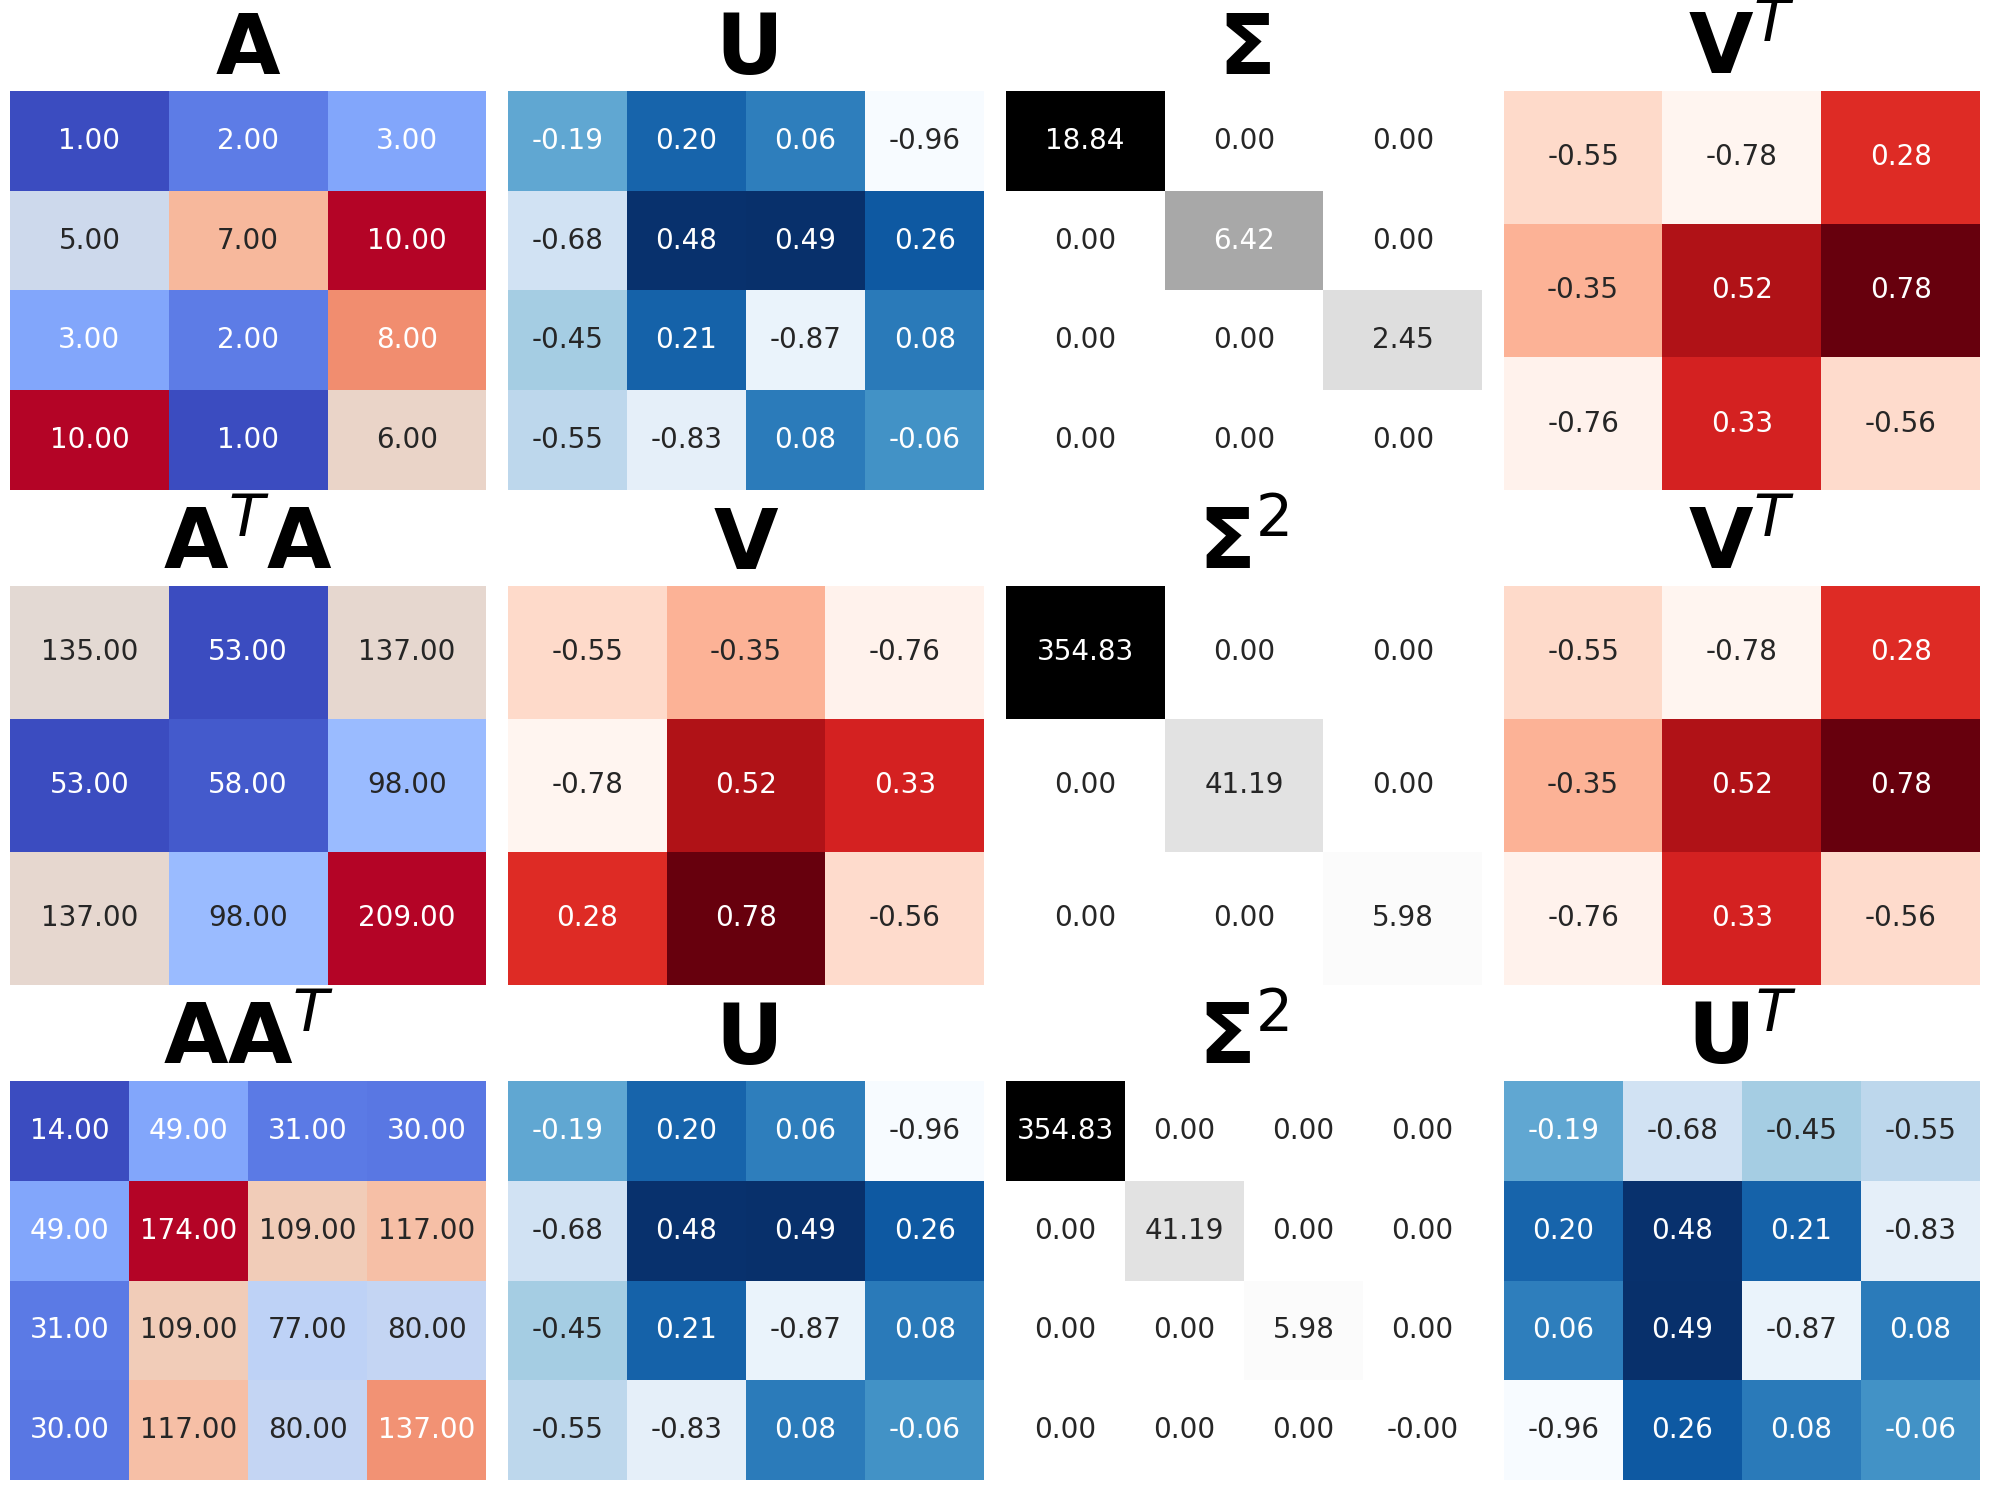

In [2]:
# Title font size
TITLE_FONT_SIZE = 60

# --- 3x4 Figure: Decompositions ---
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Row 1: A = U Σ V.T
sns.heatmap(A, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0, 0], cbar=False, annot_kws={"size": 20})
axes[0, 0].set_title(r'$\mathbf{A}$', fontsize=TITLE_FONT_SIZE)
axes[0, 0].axis('off')

sns.heatmap(U, annot=True, fmt='.2f', cmap='Blues', ax=axes[0, 1], cbar=False, annot_kws={"size": 20})
axes[0, 1].set_title(r'$\mathbf{U}$', fontsize=TITLE_FONT_SIZE)
axes[0, 1].axis('off')

Sigma_matrix = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma_matrix, S)
sns.heatmap(Sigma_matrix, annot=True, fmt='.2f', cmap='gray_r', ax=axes[0, 2], cbar=False, annot_kws={"size": 20})
axes[0, 2].set_title(r'$\mathbf{\Sigma}$', fontsize=TITLE_FONT_SIZE)
axes[0, 2].axis('off')

sns.heatmap(V.T, annot=True, fmt='.2f', cmap='Reds', ax=axes[0, 3], cbar=False, annot_kws={"size": 20})
axes[0, 3].set_title(r'$\mathbf{V}^T$', fontsize=TITLE_FONT_SIZE)
axes[0, 3].axis('off')

# Row 2: A'A = V Σ^2 V^T

sns.heatmap(AtA, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0], cbar=False, annot_kws={"size": 20})
axes[1, 0].set_title(r'$\mathbf{A}^T\mathbf{A}$', fontsize=TITLE_FONT_SIZE)
axes[1, 0].axis('off')

sns.heatmap(V, annot=True, fmt='.2f', cmap='Reds', ax=axes[1, 1], cbar=False, annot_kws={"size": 20})
axes[1, 1].set_title(r'$\mathbf{V}$', fontsize=TITLE_FONT_SIZE)
axes[1, 1].axis('off')

sns.heatmap(np.diag(sigma_2_1), annot=True, fmt='.2f', cmap='gray_r', ax=axes[1, 2], cbar=False, annot_kws={"size": 20})
axes[1, 2].set_title(r'$\mathbf{\Sigma}^2$', fontsize=TITLE_FONT_SIZE)
axes[1, 2].axis('off')

sns.heatmap(V.T, annot=True, fmt='.2f', cmap='Reds', ax=axes[1, 3], cbar=False, annot_kws={"size": 20})
axes[1, 3].set_title(r'$\mathbf{V}^T$', fontsize=TITLE_FONT_SIZE)
axes[1, 3].axis('off')

# Row 3: AA' = U Σ^2 U^T
sns.heatmap(AAt, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[2, 0], cbar=False, annot_kws={"size": 20})
axes[2, 0].set_title(r'$\mathbf{A}\mathbf{A}^T$', fontsize=TITLE_FONT_SIZE)
axes[2, 0].axis('off')

sns.heatmap(U, annot=True, fmt='.2f', cmap='Blues', ax=axes[2, 1], cbar=False, annot_kws={"size": 20})
axes[2, 1].set_title(r'$\mathbf{U}$', fontsize=TITLE_FONT_SIZE)
axes[2, 1].axis('off')

sns.heatmap(np.diag(sigma_2_2), annot=True, fmt='.2f', cmap='gray_r', ax=axes[2, 2], cbar=False, annot_kws={"size": 20})
axes[2, 2].set_title(r'$\mathbf{\Sigma}^2$', fontsize=TITLE_FONT_SIZE)
axes[2, 2].axis('off')

sns.heatmap(U.T, annot=True, fmt='.2f', cmap='Blues', ax=axes[2, 3], cbar=False, annot_kws={"size": 20})
axes[2, 3].set_title(r'$\mathbf{U}^T$', fontsize=TITLE_FONT_SIZE)
axes[2, 3].axis('off')

# Show the plot
plt.tight_layout()
plt.savefig('spectral_decomposition_and_svd.png', dpi=300)
plt.show()